# 911 Calls Analysis

### Data loading and checking

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
data = df = pd.read_csv('C:/Users/Ola/Downloads/911.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
data.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1


In [6]:
#removing dummy values - column 'e'
data.drop('e', axis=1, inplace=True)

In [7]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [13]:
data.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
dtype: int64

##### There is 12855 null values for zip column, 43 for twp column and 519 for address one but they do not affect future analysis.

### Basic Questions

In [9]:
#5 most popular zip codes
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
#5 most popular townships
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
#checking how many uniqe title codes are in downloaded dataset
data['title'].nunique()

110

### Analysis

In [14]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


##### Title column contain calls reason and departments which are responsible for operation. 

In [16]:
#dividing title column between reason column and department one
data['Reason']=data['title'].apply(lambda title: title.split(':')[0])
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


In [17]:
data['Dep']=data['title'].apply(lambda dep: dep.split(':')[1:])
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Dep
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,[ BACK PAINS/INJURY]
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,[ DIABETIC EMERGENCY]
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,[ GAS-ODOR/LEAK]
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,[ CARDIAC EMERGENCY]
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,[ DIZZINESS]


In [19]:
#removing title column
data.drop('title', axis=1, inplace=True)

In [20]:
data.head()

,lat,lng,desc,zip,timeStamp,twp,addr,Reason,Dep
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,[ BACK PAINS/INJURY]
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,[ DIABETIC EMERGENCY]
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,[ GAS-ODOR/LEAK]
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,[ CARDIAC EMERGENCY]
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,[ DIZZINESS]


In [22]:
#analysing Reason column
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

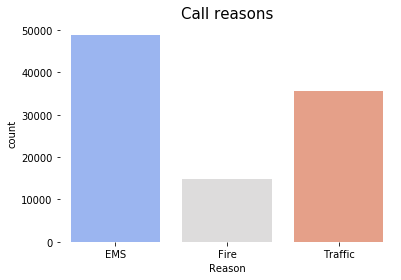

In [59]:
#creating countplot of Reason Calls
sns.countplot(x='Reason', data=data, palette='coolwarm')
plt.title('Call reasons', size=15)
plt.box(False)

##### EMS is the most popular reason for calling 911 - 48877 times. 

In [28]:
#creating time to reason plot
type(df['timeStamp'].iloc[0])

str

In [46]:
#using datetime object to divide column
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Day of Week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [47]:
data.head()

,lat,lng,desc,zip,timeStamp,twp,addr,Reason,Dep,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,[ BACK PAINS/INJURY],17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,[ DIABETIC EMERGENCY],17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,[ GAS-ODOR/LEAK],17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,[ CARDIAC EMERGENCY],17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,[ DIZZINESS],17,12,3


In [48]:
#renaming Day of Week column to string names
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [49]:
data['Day of Week'] = data['Day of Week'].map(dmap)

In [50]:
data.head()

,lat,lng,desc,zip,timeStamp,twp,addr,Reason,Dep,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,[ BACK PAINS/INJURY],17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,[ DIABETIC EMERGENCY],17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,[ GAS-ODOR/LEAK],17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,[ CARDIAC EMERGENCY],17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,[ DIZZINESS],17,12,Thu


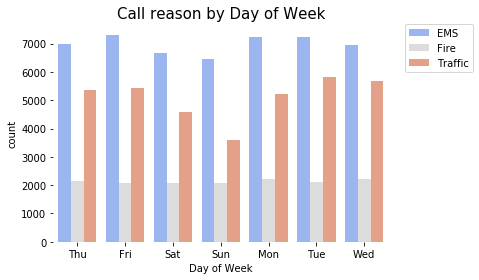

In [62]:
sns.countplot(x='Day of Week', data=data, hue='Reason', palette='coolwarm')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Call reason by Day of Week', size=15)
plt.box(False)

##### Number of Fire calls are the same for each day.

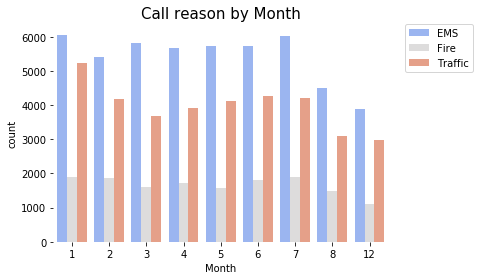

In [63]:
sns.countplot(x='Month', data=data, hue='Reason', palette='coolwarm')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Call reason by Month', size=15)
plt.box(False)

In [66]:
#there is some months missing - 9, 10, 11. grouping data for check:
month_group = data.groupby('Month').count()
month_group

,lat,lng,desc,zip,timeStamp,twp,addr,Reason,Dep,Hour,Day of Week
Month,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7963,7916,7969,7969,7969,7969


(0, 12.55)

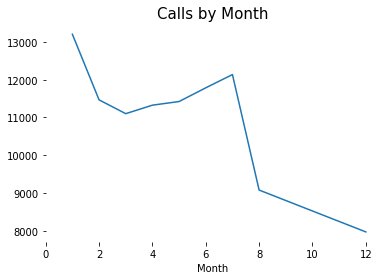

In [73]:
#creating simple plot to show the results by the line
month_group['Reason'].plot()

plt.title('Calls by Month', size=15)
plt.box(False)
plt.xlim(0)

##### The decline from 8 month is visible. 

(0, 12.680046926872375)

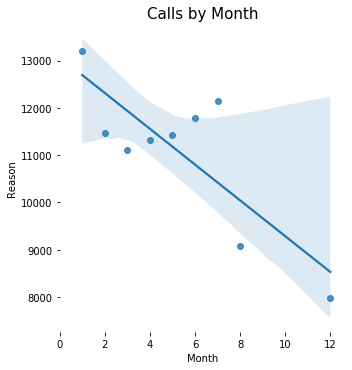

In [72]:
sns.lmplot(x='Month',y='Reason', data=month_group.reset_index())

plt.title('Calls by Month', size=15)
plt.box(False)
plt.xlim(0)

#now missed calls in 9,10,11 months are visible

##### Dependence between month and calls is linear.

In [74]:
#creating Date column 
data['Date']=data['timeStamp'].apply(lambda t: t.date())
data.head()

,lat,lng,desc,zip,timeStamp,twp,addr,Reason,Dep,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,[ BACK PAINS/INJURY],17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,[ DIABETIC EMERGENCY],17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,[ GAS-ODOR/LEAK],17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,[ CARDIAC EMERGENCY],17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,[ DIZZINESS],17,12,Thu,2015-12-10


In [78]:
#removing timeStamp column - all values have been separated to undemendence columns
data.drop('timeStamp', axis=1, inplace=True)
data.head()

,lat,lng,desc,zip,twp,addr,Reason,Dep,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,EMS,[ BACK PAINS/INJURY],17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,[ DIABETIC EMERGENCY],17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,Fire,[ GAS-ODOR/LEAK],17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,EMS,[ CARDIAC EMERGENCY],17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,[ DIZZINESS],17,12,Thu,2015-12-10


In [141]:
date_group = data.groupby('Date').count().reset_index()
date_group

,Date,lat,lng,desc,zip,twp,addr,Reason,Dep,Hour,Month,Day of Week
0,2015-12-10,115,115,115,100,115,113,115,115,115,115,115
1,2015-12-11,396,396,396,333,395,391,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,401,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,317,319,319,319,319,319
4,2015-12-14,447,447,447,387,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...
254,2016-08-20,328,328,328,279,328,327,328,328,328,328,328
255,2016-08-21,357,357,357,299,357,352,357,357,357,357,357
256,2016-08-22,389,389,389,336,388,384,389,389,389,389,389
257,2016-08-23,439,439,439,390,439,437,439,439,439,439,439


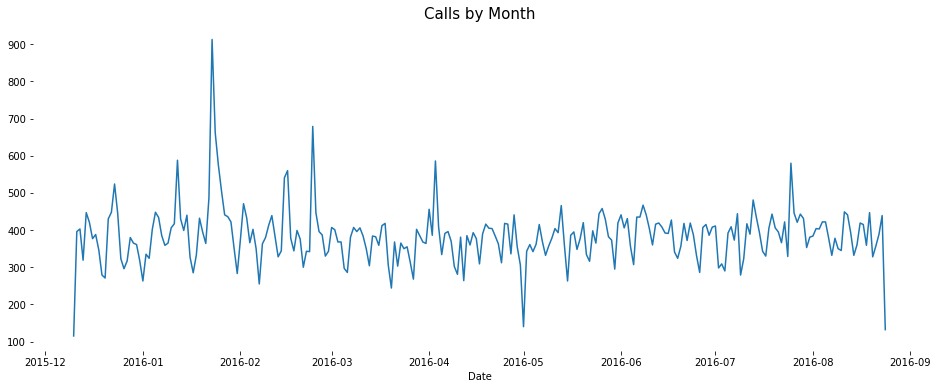

In [86]:
plt.figure(figsize=(16,6))
date_group['Reason'].plot()

plt.title('Calls by Month', size=15)
plt.box(False)


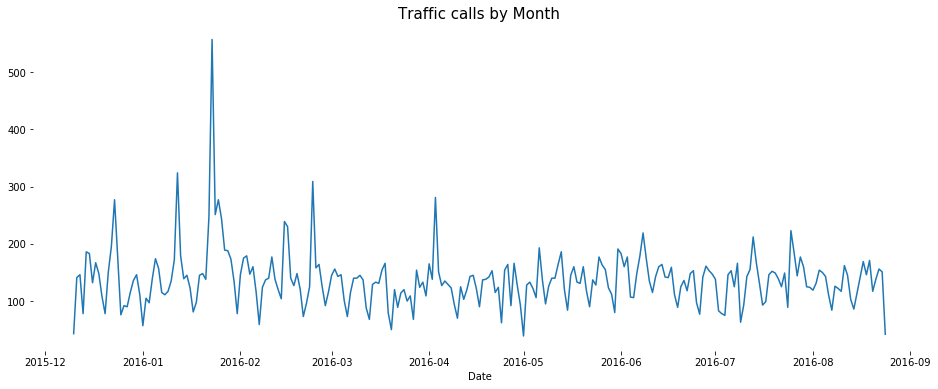

In [105]:
plt.figure(figsize=(16,6))
data[data['Reason']=='Traffic'].groupby('Date').count()['Reason'].plot()

plt.title('Traffic calls by Month', size=15)
plt.box(False)

##### Traffic calls between January and Feburay are above 500. From May to September values are on the same level.

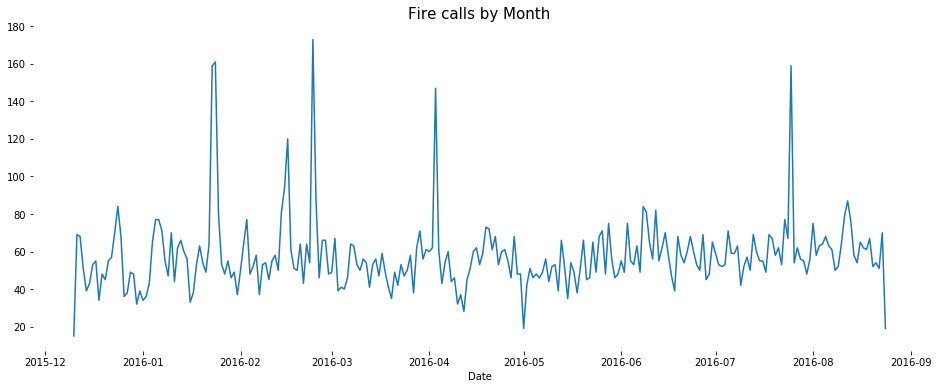

In [106]:
plt.figure(figsize=(16,6))
data[data['Reason']=='Fire'].groupby('Date').count()['Reason'].plot()

plt.title('Fire calls by Month', size=15)
plt.box(False)

##### There are some peaks in fire calls. Summer months are rather on one level.

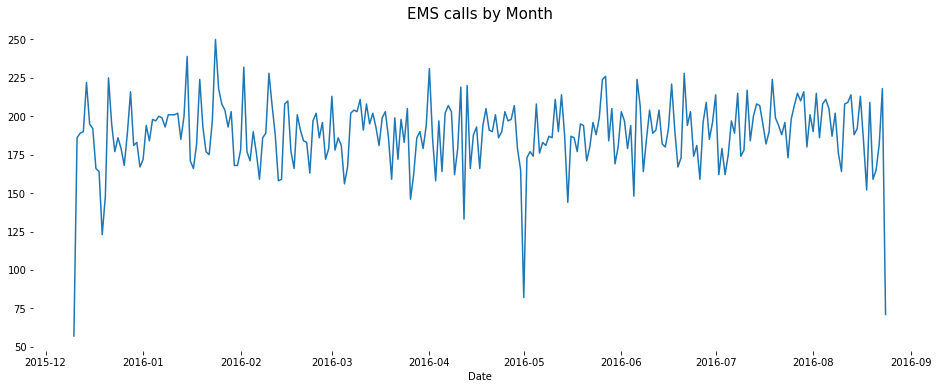

In [107]:
plt.figure(figsize=(16,6))
data[data['Reason']=='EMS'].groupby('Date').count()['Reason'].plot()

plt.title('EMS calls by Month', size=15)
plt.box(False)

##### EMS calls are mostly constant. Visible decline is in May and September.

In [142]:
date_group

,Date,lat,lng,desc,zip,twp,addr,Reason,Dep,Hour,Month,Day of Week
0,2015-12-10,115,115,115,100,115,113,115,115,115,115,115
1,2015-12-11,396,396,396,333,395,391,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,401,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,317,319,319,319,319,319
4,2015-12-14,447,447,447,387,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...
254,2016-08-20,328,328,328,279,328,327,328,328,328,328,328
255,2016-08-21,357,357,357,299,357,352,357,357,357,357,357
256,2016-08-22,389,389,389,336,388,384,389,389,389,389,389
257,2016-08-23,439,439,439,390,439,437,439,439,439,439,439


In [159]:
#merging data
merged = pd.concat([data, date_group], ignore_index=True)
merged

,lat,lng,desc,zip,twp,addr,Reason,Dep,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,EMS,[ BACK PAINS/INJURY],17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,[ DIABETIC EMERGENCY],17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,Fire,[ GAS-ODOR/LEAK],17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,EMS,[ CARDIAC EMERGENCY],17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,[ DIZZINESS],17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...
99746,328.000000,328.000000,328,279.0,328,327,328,328,328,328,328,2016-08-20
99747,357.000000,357.000000,357,299.0,357,352,357,357,357,357,357,2016-08-21
99748,389.000000,389.000000,389,336.0,388,384,389,389,389,389,389,2016-08-22
99749,439.000000,439.000000,439,390.0,439,437,439,439,439,439,439,2016-08-23


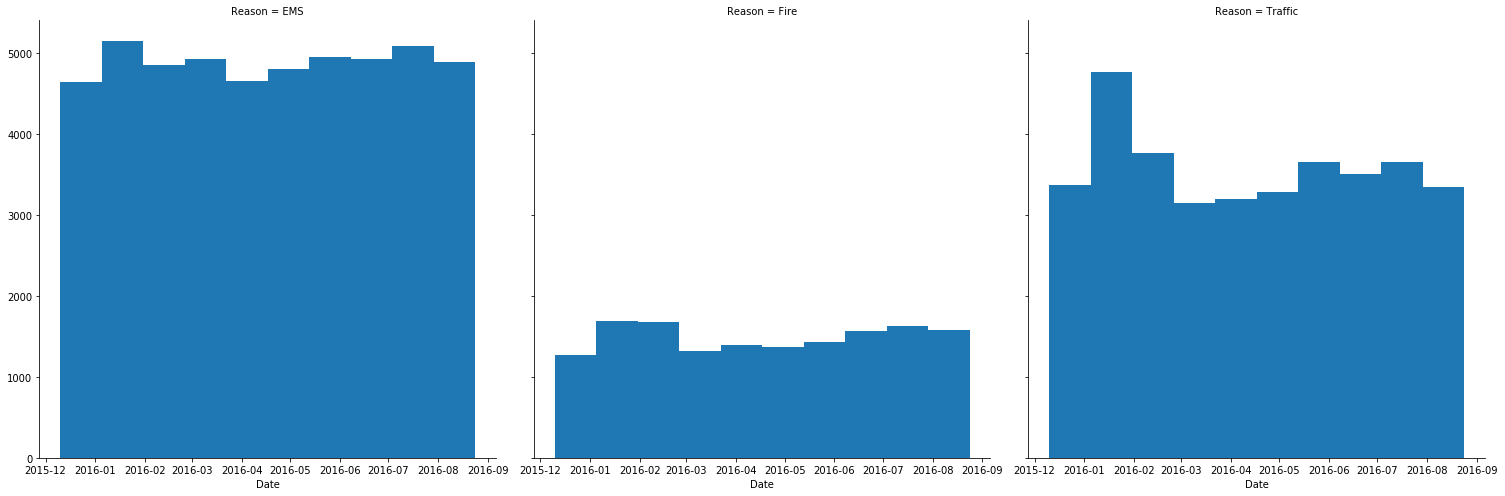

In [186]:
#merged hist plots for Reason and Months to compare
sns.FacetGrid(data=data, col='Reason', height=7).map(plt.hist, 'Date')


##### EMS calls have the higest values.

In [108]:
#creating heatmaps - grouping data by Day of Week and Hour
dayHour_group = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour_group.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Text(0.5, 1, 'Calls by Day and Hour')

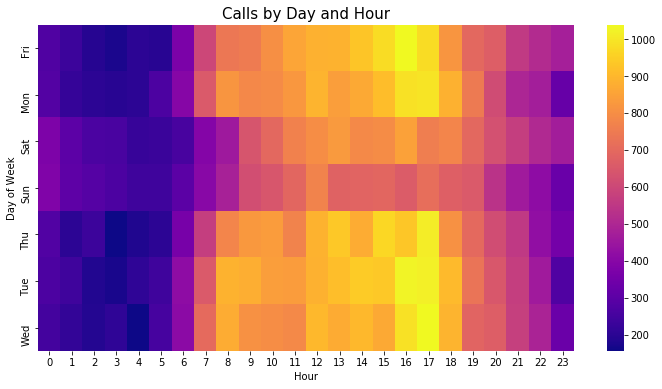

In [113]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour_group,cmap='plasma')

plt.title('Calls by Day and Hour', size=15)

##### Most calls are between 16 and 17 from Monday to Friday. Weekend values are lower than others.

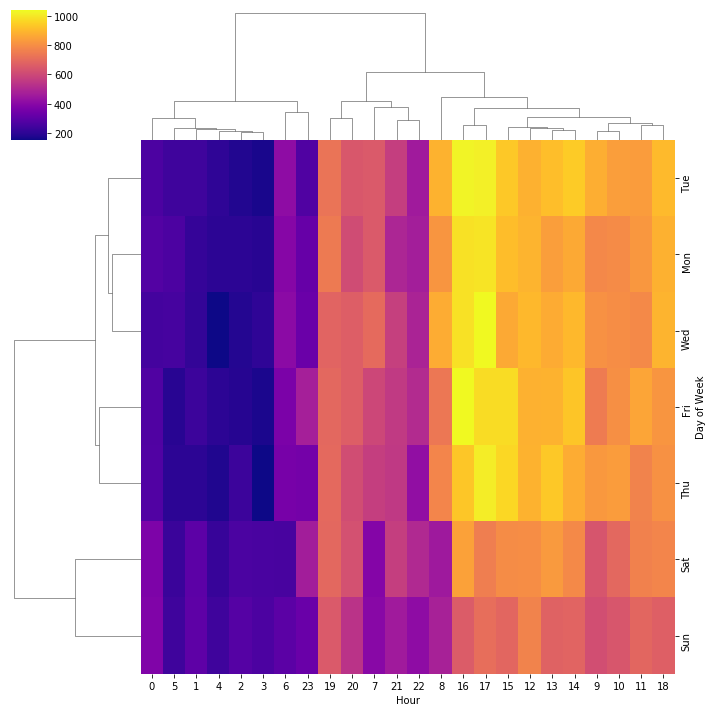

In [120]:
sns.clustermap(dayHour_group,cmap='plasma')

##### Monday and Tuesday are these days which are most similar. Bewteen 3 and 6 hour there is also big similarity.

In [121]:
#grouping data by Day of Week and Month
dayMonth_group = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth_group.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


Text(0.5, 1, 'Calls by Day and Month')

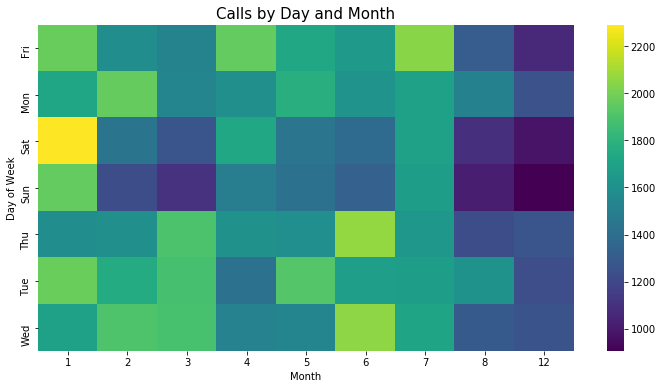

In [123]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth_group,cmap='viridis')

plt.title('Calls by Day and Month', size=15)

##### Saturday in January is the month which has most calls.

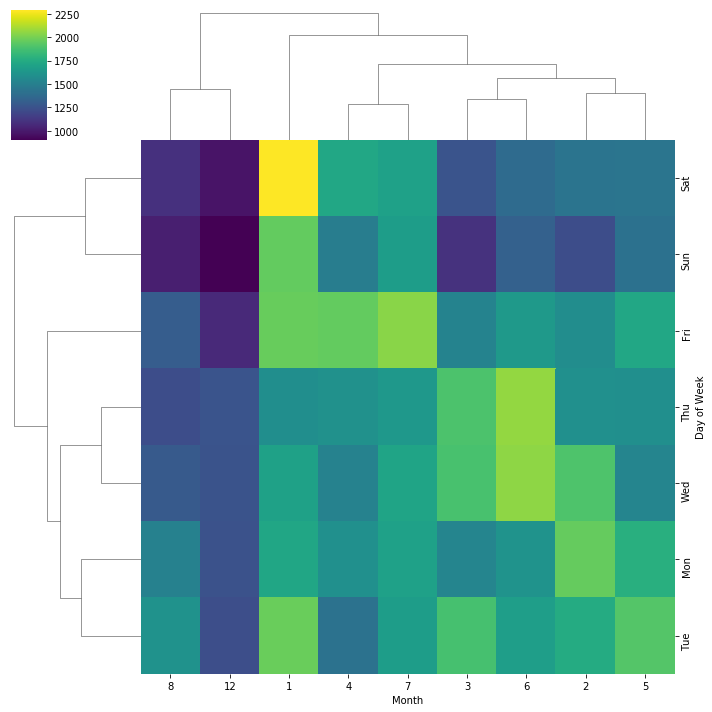

In [124]:
sns.clustermap(dayMonth_group,cmap='viridis')

##### Most similar are Wednesday with Thusday and April with July.